In [14]:
import numpy as np
import math
from qiskit.circuit import Parameter
from qiskit import *
from math import pi,cos,sin,tan,atan

from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
def execute_circuit_sv(quantum_circuit):
    statevector_simulator = Aer.get_backend('statevector_simulator')
    result = execute(quantum_circuit, statevector_simulator).result()
    statevector_results = result.get_statevector(quantum_circuit)
    circuit_diagram = quantum_circuit.draw('mpl')
    b_sphere = plot_bloch_multivector(statevector_results)
    
    return statevector_results, circuit_diagram, b_sphere

In [15]:

param_theta = Parameter('θ')
n = int(input("Enter the number of qubits(Max no. 5):  "))
bell = QuantumCircuit(n, name='entanglement')
rot = int(input("Press 1 to select RX gate, 2 for RY gate"))
if rot==1:
   bell.rx(param_theta,0)
elif rot==2:
    bell.ry(param_theta,0)
else:
    print("Please Enter the correct option")

control = int(input("Press 1 to use CNOT gate and 2 for CY gate"))
if control==1:
    for i in range (0,n-1):
        bell.cx(i,i+1)
elif control==2:
    for j in range(0,n-1):
        bell.cy(j,j+1)
else:
    print("Please press the correct option")

Enter the number of qubits(Max no. 5):  2
Press 1 to select RX gate, 2 for RY gate1
Press 1 to use CNOT gate and 2 for CY gate1


In [16]:
    import numpy as np
    from math import pi,cos,sin,tan,atan
    x = float(input("Enter the angle multiplier: "))

    bell = bell.bind_parameters({param_theta:  (x * np.pi)})


Enter the angle multiplier: 1


In [20]:
result, img, bsphere = execute_circuit_sv(bell)
img.savefig('img.png')
bsphere.savefig('bsphere.png')

In [18]:
img.savefig('img.png')

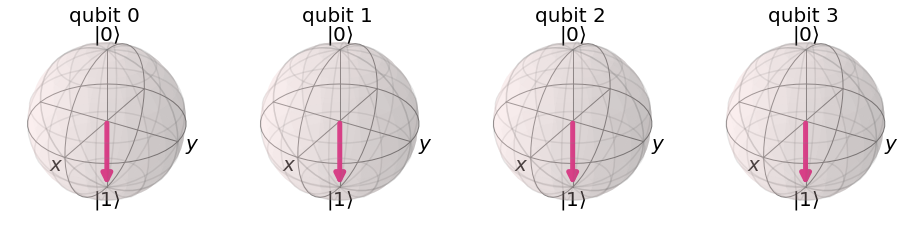

In [5]:
bsphere

In [6]:
print(result)

Statevector([6.123234e-17+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
             0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
             0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
             0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
             0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
             0.000000e+00-1.j],
            dims=(2, 2, 2, 2))


In [7]:
from qiskit.quantum_info import DensityMatrix, partial_trace

In [8]:
D = DensityMatrix(bell)
print(D)


DensityMatrix([[3.74939946e-33+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+6.123234e-17j],
               [0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.000000e+00j,
                0.00000000e+00+0.

In [9]:
from qiskit.quantum_info import entropy
vn_entropy = entropy(D, base=2)
print(vn_entropy)

4.038739397709968e-31


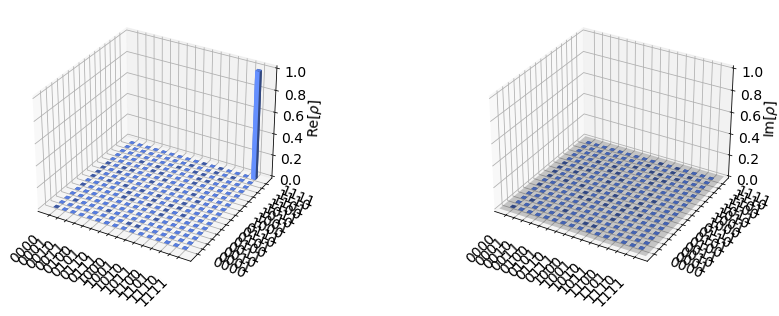

In [10]:
from qiskit.visualization import plot_state_city
plot_state_city(D)

Enter the index no. of qubit for which you want to perform partial trace(0-(n-1)): 2
DensityMatrix([[3.74939946e-33+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j],
               [0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j],
               [0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j],
               [0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j],
               

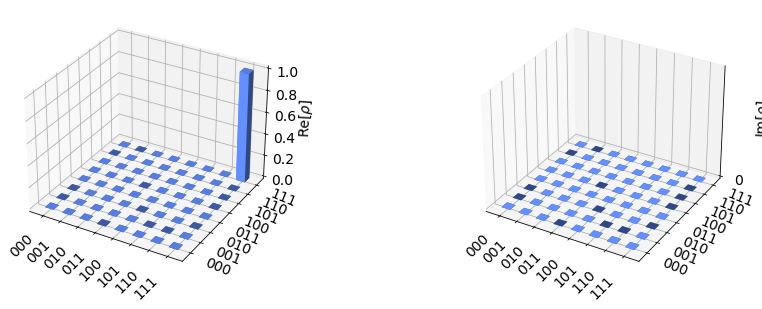

In [11]:
qp = int(input("Enter the index no. of qubit for which you want to perform partial trace(0-(n-1)): "))
p = partial_trace(D,[qp]) #trace out nth qubit
print(p)
plot_state_city(p)

In [12]:
r = x / 0.5
if x % 0.5 == 0 and r % 2 != 0:
    print("Maximal Entanglement")
else:
    print("Partial Entanglement")

Partial Entanglement
